In [103]:
# Boilerplate at top of file
%load_ext autoreload

%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from ggplot import *


### Custom
import nltk
import sys
sys.path.append('../')
import cleaner
from feature_eng import FeatureFactory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
# df_train = pd.read_csv('../data/train_sample.csv', encoding='ISO-8859-1')
df_train = pd.read_csv('../data/train_joined.csv', encoding='ISO-8859-1')


Loading global tagger... please wait a few seconds


In [ ]:
ff = FeatureFactory(corpus_csv='../data/product_descriptions.csv', pickle_path = '../pickles/')

In [167]:



df_train_feats = ff.apply_feature_eng(df_train, verbose=True)


Computing feature  ['NumOfWordsInSearchTerm']
Computing feature  ['NumOfCharsInSearchTerm']
Computing feature  ['NumOfWordsInTitle']
Computing feature  ['NumOfCharsInTitle']
Computing feature  ['NumOfWordsInProdDescrip']
Computing feature  ['NumOfCharsInProdDescrip']
Computing feature  ['NumOfCharsInBrand']
Computing feature  ['SearchAndTitleMatch']
Computing feature  ['SearchAndTitleNAdjMatch']
Computing feature  ['SearchAndDescriptionMatch']
Computing feature  ['SearchAndDescriptionNAdjMatch']
Computing feature  ['SearchAndProductBrandMatch']
Computing feature  ['SearchAndProductBulletsMatch']
Computing feature  ['SearchAndProductSizeMatch']
Computing feature  ['SearchAndProductWeightMatch']
Computing feature  ['SearchAndProductSizeInRange']
Computing feature  ['SearchAndProductWeightInRange']
Computing feature  ['SearchAndProductLastWordMatch']
Computing feature  ['SearchAndProductLastWordNAdjMatch']
Computing feature  ['RatioOfDescripToSearch']
Computing feature  ['RatioOfTitleToSe

In [120]:
feature_columns = ff.get_feature_names()
ff.get_feature_descriptions()

[(['NumOfWordsInSearchTerm'], ['Number of words in the search term']),
 (['NumOfCharsInSearchTerm'], ['Number of characters in the search term']),
 (['NumOfWordsInTitle'], ['Number of words in the product title']),
 (['NumOfCharsInTitle'], ['Number of characters in the product title']),
 (['NumOfWordsInProdDescrip'], ['Number of words in the product description']),
 (['NumOfCharsInProdDescrip'],
  ['Number of characters in the product description']),
 (['NumOfCharsInBrand'], ['Number of characters in the product brand']),
 (['SearchAndTitleMatch'], ['Is the search term in the product title?']),
 (['SearchAndTitleNAdjMatch'], ['Is the search term in the product title?']),
 (['SearchAndDescriptionMatch'],
  ['How does the search term match the product description?']),
 (['SearchAndDescriptionNAdjMatch'],
  ['How does the search term match the product description, nouns and adjectives?']),
 (['SearchAndProductBrandMatch'], ['Does the search term have a product?']),
 (['SearchAndProductBul

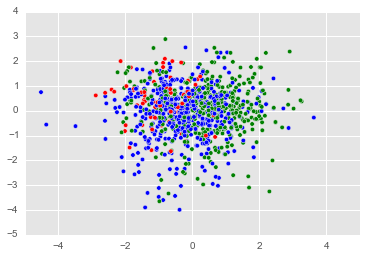

In [121]:
from sklearn.lda import LDA

lda = LDA()
X = lda.fit_transform(df_train[feature_columns], np.round(df_train['relevance']))
Y = np.round(df_train['relevance']) - 1
colors=['red', 'blue', 'green']
plt.scatter(X[:,0], X[:,1], c = map(lambda x: colors[int(x)], Y))

In [122]:
df_train[feature_columns]

,NumOfWordsInSearchTerm,NumOfCharsInSearchTerm,NumOfWordsInTitle,NumOfCharsInTitle,NumOfWordsInProdDescrip,NumOfCharsInProdDescrip,NumOfCharsInBrand,SearchAndTitleMatch,SearchAndTitleNAdjMatch,SearchAndDescriptionMatch,...,SearchAndProductSizeMatch,SearchAndProductWeightMatch,SearchAndProductSizeInRange,SearchAndProductWeightInRange,SearchAndProductLastWordMatch,SearchAndProductLastWordNAdjMatch,RatioOfDescripToSearch,RatioOfTitleToSearch,SearchDescriptionCountVectorizer,SearchDescriptionTfidfVectorizer
0,3,14,12,81,93,639,11,1,1,0,...,False,False,False,False,0,0,31,4,0.102869,0.021857
1,4,23,16,94,78,508,5,3,3,0,...,False,False,False,False,1,1,19,4,0.356348,0.227638
2,1,9,6,38,88,624,18,0,0,0,...,False,False,False,False,0,0,88,6,0.000000,0.000000
3,6,36,10,70,64,435,11,4,2,0,...,False,False,False,False,0,0,10,1,0.236678,0.174012
4,2,11,7,42,194,1294,7,1,1,0,...,False,False,False,False,0,0,97,3,0.289642,0.439485
5,2,10,8,39,102,762,7,1,0,0,...,False,False,False,False,0,0,51,4,0.409644,0.216518
6,4,21,11,46,67,377,9,2,2,0,...,False,False,False,False,0,0,16,2,0.242536,0.228485
7,2,9,4,29,93,649,9,2,2,0,...,False,False,False,False,1,1,46,2,0.296695,0.365894
8,2,12,15,67,185,1188,9,1,1,0,...,False,False,False,False,1,1,92,7,0.090536,0.125016
9,1,6,6,39,147,955,11,1,1,0,...,False,False,False,False,0,0,147,6,0.278543,0.393738


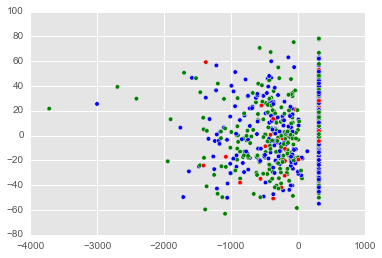

In [123]:
from sklearn.decomposition import pca

pca = pca.PCA(n_components=2)
X = pca.fit_transform(df_train[feature_columns])
colors=['red', 'blue', 'green']
plt.scatter(X[:,0], X[:,1], c = map(lambda x: colors[int(x)], Y))

# Regression Model

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold

In [156]:
rf = RandomForestRegressor()

lm = LinearRegression()

In [148]:
np.array(X)

array([[3, 14, 12, ..., 4, 0.10286889997472792, 0.021856653006473367],
       [4, 23, 16, ..., 4, 0.3563483225498992, 0.22763820932130804],
       [1, 9, 6, ..., 6, 0.0, 0.0],
       ..., 
       [3, 21, 16, ..., 5, 0.06851887098275317, 0.03208905504494529],
       [6, 36, 16, ..., 2, 0.1620474570902318, 0.14808238480151503],
       [4, 18, 20, ..., 5, 0.0, 0.0]], dtype=object)

In [165]:
def apse_k_fold(clf, df, x_col, y_col, k = 10, m_metric = mean_squared_error):
    n = len(df)

    kf = KFold(n, n_folds=k)

    X = np.array(df[x_col])
    y = np.array(df[y_col])
    print '%s Fold Cross Validation for %s' % (k, clf.__class__.__name__)
    for train_index, test_index in kf:
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print m_metric(y_test, y_pred)
apse_k_fold(rf, df_train, feature_columns, 'relevance')

apse_k_fold(lm, df_train, feature_columns, 'relevance' )

10 Fold Cross Validation for RandomForestRegressor
0.28985597
0.2657008
0.26825864
0.23332308
0.27963938
0.31076709
0.27515325
0.27236348
0.28761348
0.33637234
10 Fold Cross Validation for LinearRegression
0.254758075118
0.22464419463
0.216268994813
0.219629785441
0.231104061834
0.269280889428
0.245583737456
0.252274715742
0.249539984221
0.320301136226
